# Comparison/Evaluation

## Comparing the models

In [ ]:
# Collect the metrics from each model
all_metrics = [
    lr_original_metrics,
    xgb_original_metrics,
    rf_original_metrics,
    lr_selected_metrics,
    xgb_selected_metrics,
    rf_selected_metrics,
    lr_engineered_metrics,
    xgb_engineered_metrics,
    rf_engineered_metrics
]

# Create the comparison DataFrame
combined_comparison_df = pd.DataFrame(all_metrics)

print("Model Performance Comparison (Original, Selected, and Engineered Features):")
display(combined_comparison_df)

Model Performance Comparison (Original, Selected, and Engineered Features):


,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression Baseline Model,0.890205,0.891405,0.911658,0.901418,0.887788
1,XGBoost Baseline Model,0.976924,0.985145,0.972758,0.978912,0.977393
2,Random Forest Baseline Model,0.976498,0.983404,0.973751,0.978554,0.976808
3,Logistic Regression Model with Selected Features,0.875752,0.904296,0.865998,0.884732,0.876850
4,XGBoost Model with Selected Features,0.968057,0.972244,0.969670,0.970955,0.967876
5,Random Forest Model with Selected Features,0.967511,0.970238,0.970773,0.970506,0.967143
6,Logistic Regression Model with Engineered Feat...,0.888869,0.889295,0.911658,0.900338,0.886302
7,XGBoost Model with Engineered Features,0.978381,0.986051,0.974523,0.980253,0.978816
8,Random Forest Model with Engineered Features,0.975162,0.983363,0.971325,0.977307,0.975595


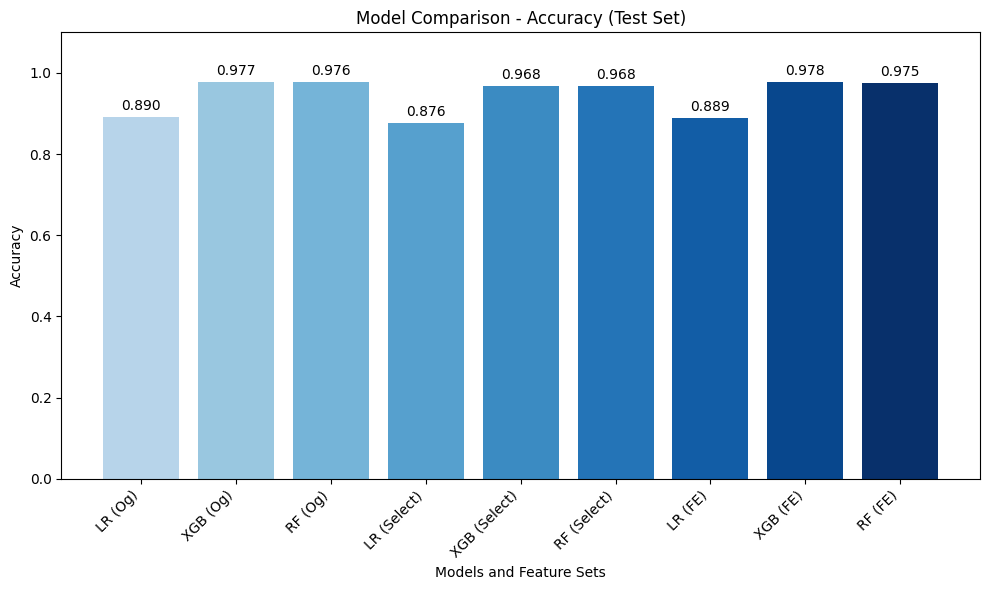

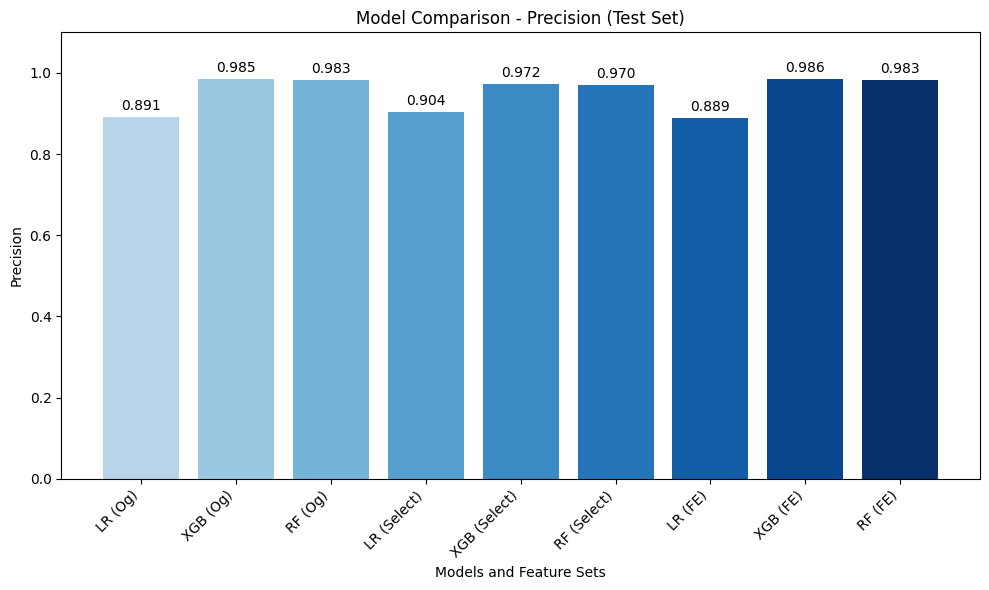

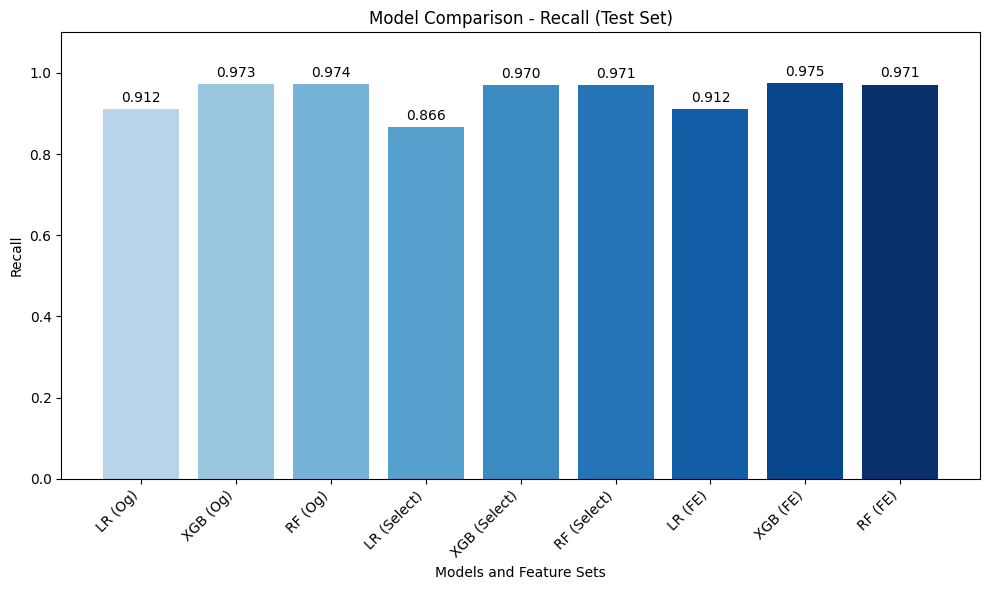

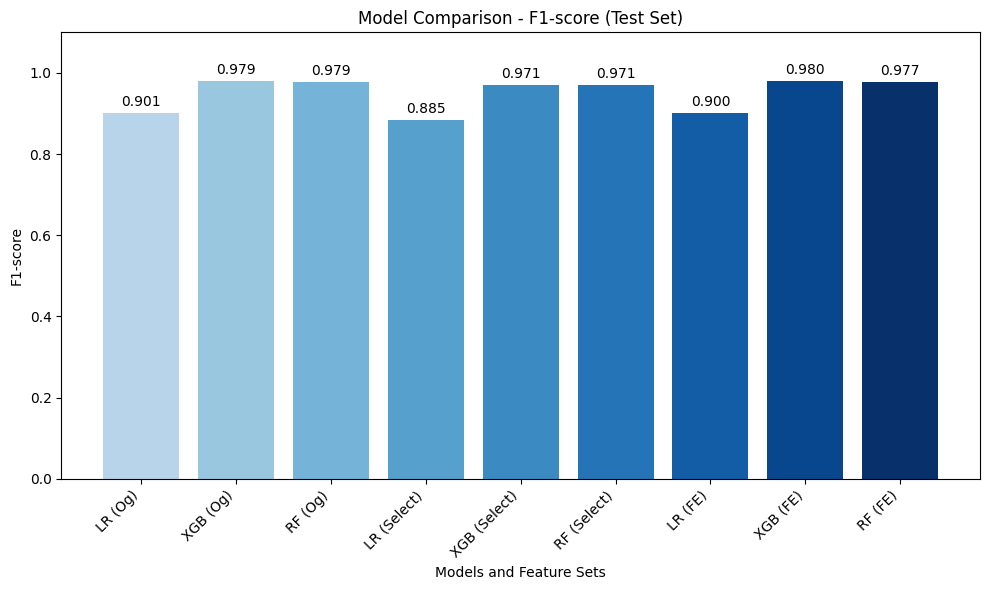

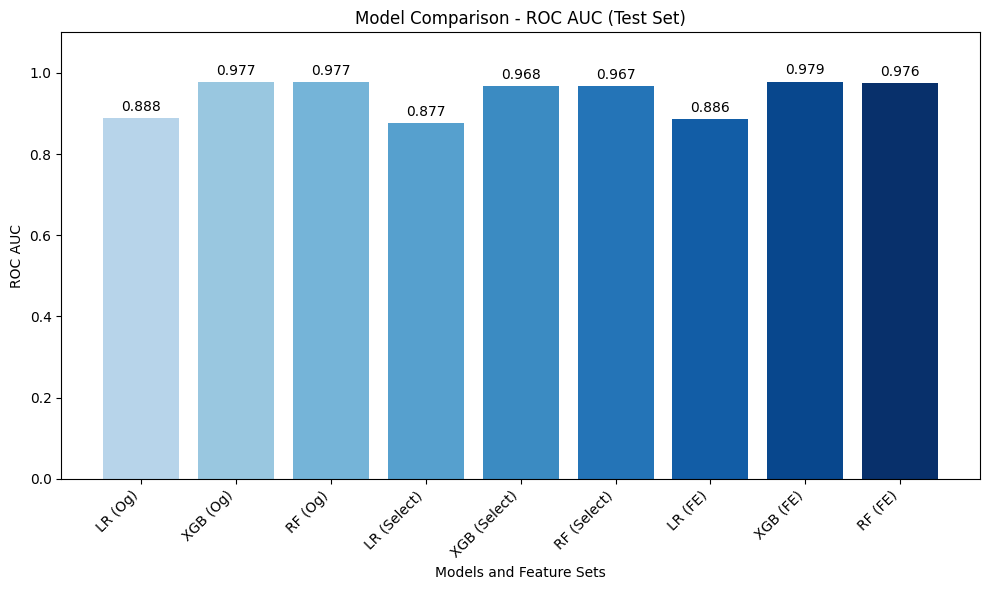

In [ ]:
comparison_metrics_for_plotting = combined_comparison_df[~combined_comparison_df['Model'].str.contains("Validation")].copy()

# Shorten model names for better plotting
model_name_mapping = {
    "Logistic Regression Baseline Model": "LR (Og)",
    "XGBoost Baseline Model": "XGB (Og)",
    "Random Forest Baseline Model": "RF (Og)",
    "Logistic Regression Model with Selected Features": "LR (Select)",
    "XGBoost Model with Selected Features": "XGB (Select)",
    "Random Forest Model with Selected Features": "RF (Select)",
    "Logistic Regression Model with Engineered Features": "LR (FE)",
    "XGBoost Model with Engineered Features": "XGB (FE)",
    "Random Forest Model with Engineered Features": "RF (FE)"
}
comparison_metrics_for_plotting['Model'] = comparison_metrics_for_plotting['Model'].map(model_name_mapping)


metrics_to_plot = comparison_metrics_for_plotting.columns.drop('Model')

cmap = plt.cm.Blues
num_models = len(comparison_metrics_for_plotting)
colors = [cmap(i) for i in np.linspace(0.3, 1, num_models)]

for metric_name in metrics_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(comparison_metrics_for_plotting['Model'], comparison_metrics_for_plotting[metric_name], color=colors)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}',
                ha='center', va='bottom')
    ax.set_xlabel('Models and Feature Sets')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Model Comparison - {metric_name} (Test Set)')
    ax.set_ylim(0, 1.1)
    ax.set_xticks(range(len(comparison_metrics_for_plotting['Model'])))
    ax.set_xticklabels(comparison_metrics_for_plotting['Model'], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

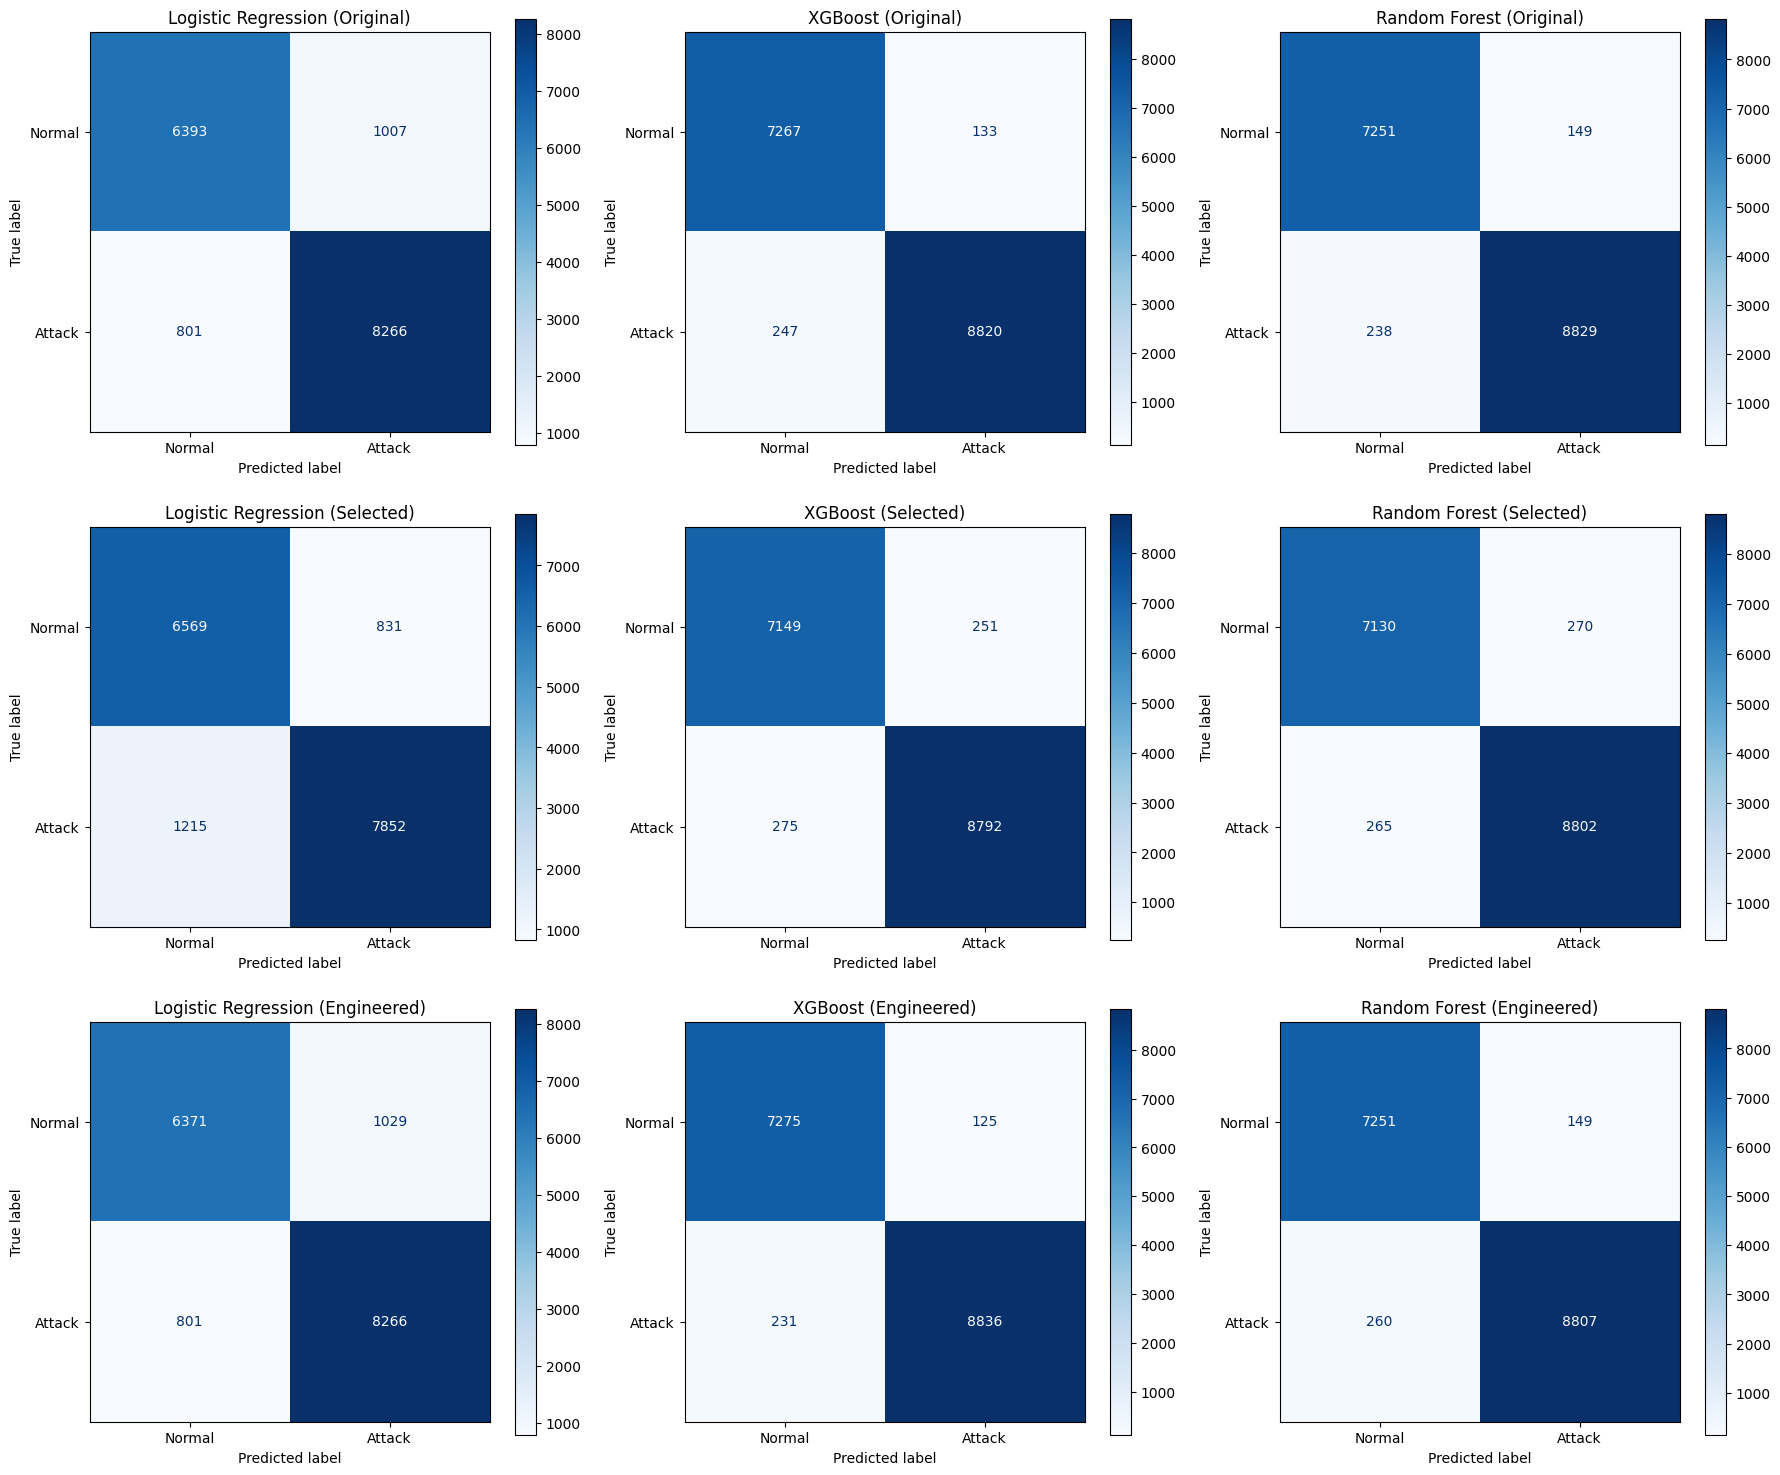

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a dictionary of models and their corresponding test data
models_and_test_data = {
    "Logistic Regression (Original)": (model, X_test, y_test),
    "XGBoost (Original)": (xgb_model, X_test, y_test),
    "Random Forest (Original)": (rf_model, X_test, y_test),

    "Logistic Regression (Selected)": (model_lr_selected, X_test_selected, y_test),
    "XGBoost (Selected)": (xgb_model_selected, X_test_selected, y_test),
    "Random Forest (Selected)": (rf_model_selected, X_test_selected, y_test),

    "Logistic Regression (Engineered)": (model_lr_engineered, X_test_engineered, y_test_engineered),
    "XGBoost (Engineered)": (xgb_model_engineered, X_test_engineered, y_test_engineered),
    "Random Forest (Engineered)": (rf_model_engineered, X_test_engineered, y_test_engineered),
}

n_models = len(models_and_test_data)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot confusion matrix for each model
for i, (model_name, (model, X_test_data, y_test_data)) in enumerate(models_and_test_data.items()):
    try:
        y_pred = model.predict(X_test_data)
        cm = confusion_matrix(y_test_data, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
        disp.plot(ax=axes[i], cmap=plt.cm.Blues)
        disp.ax_.set_title(model_name)
    except ValueError as e:
        axes[i].axis('off')
        axes[i].text(0.5, 0.5, f"Error:\n{e}", ha='center', va='center', wrap=True)
        axes[i].set_title(model_name)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


**Summary** -------------------------------
* After comparing all the models it can be seen that XGBoost performed the best across all metrics for all the models. The XGBoost Model with engineered features was the overall best performing having the best metrics and the best confusion matrix overall.
* This model will be used to evaluate the validation sample and the main metric that will be used to determine the overall performance will be the F1 score.


## Evaluate Performance on Validation Sample

In [ ]:
# Make predictions on the validation set using the trained XGBoost model with engineered features
y_pred_val_xgb_engineered = xgb_model_engineered.predict(X_val_engineered)

# Evaluate the model on the validation set using the new function
xgb_engineered_validation_metrics = evaluate_model_performance(y_val_engineered, y_pred_val_xgb_engineered, model_name="XGBoost Model with Engineered Features on Validation Set")

XGBoost Model with Engineered Features on Validation Set Performance:
Accuracy: 0.9807
Precision: 0.9869
Recall: 0.9781
F1-score: 0.9824
ROC AUC Score: 0.9811
Confusion Matrix:


array([[7282,  118],
       [ 199, 8868]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7400
           1       0.99      0.98      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467



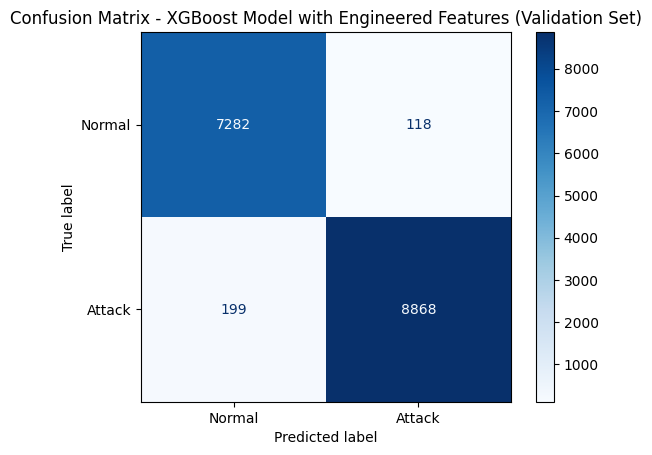

In [ ]:
# Calculate the confusion matrix
cm_val = confusion_matrix(y_val_engineered, y_pred_val_xgb_engineered)

# Display the confusion matrix
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['Normal', 'Attack'])
disp_val.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model with Engineered Features (Validation Set)')
plt.show()

**Final Analysis** --------------------


Based on the evaluation of the XGBoost model with engineered features on the validation set the model demonstrates strong performance in detecting threats in network traffic.

The F1-score of 0.9824 is particularly important as it balances Precision and Recall, providing a good measure of the model's effectiveness in correctly identifying both normal and attack sessions, which is crucial for network threat detection.

The confusion matrix for the validation set provides further insight:
- **True Positives (Attack correctly identified):** 7282
- **True Negatives (Normal correctly identified):** 8868
- **False Positives (Normal incorrectly identified as Attack):** 118
- **False Negatives (Attack incorrectly identified as Normal):** 199

The high number of True Positives and True Negatives, paired with  low False Positives and False Negatives, indicates that the model is effective at distinguishing between normal and malicious network traffic. The F1-score on the validation set is very close to the F1-score observed on the test set (0.980), suggesting that the model generalizes well and is not significantly overfitting to the training data.

Overall, the XGBoost model with engineered features appears to be a robust and effective solution for this binary classification task of detecting network threats.